


**Prediction of Earthquakes in India**



---



Earthquakes in India unleash devastating havoc, claiming lives, demolishing infrastructure, and displacing communities. These seismic events leave a trail of destruction, causing immense human suffering and economic loss. Preparedness, early warning systems, and robust infrastructure are crucial for mitigating the impact of earthquakes and ensuring the safety of vulnerable populations.

# Importing Dependencies


In [ ]:
pip install numpy

In [ ]:
pip install pandas

In [ ]:
pip install matplotlib

In [ ]:
pip install prophet

In [ ]:
pip install folium

In [159]:
pip install seaborn

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import folium
import seaborn as sns

# Loading the Dataset

In [ ]:
df = pd.read_csv('IndianEarthquakeData.csv')
df.head()

,Origin Time,Latitude,Longitude,Depth,Magnitude,Location
0,2021-07-31 09:43:23 IST,29.06,77.42,5.0,2.5,"53km NNE of New Delhi, India"
1,2021-07-30 23:04:57 IST,19.93,72.92,5.0,2.4,"91km W of Nashik, Maharashtra, India"
2,2021-07-30 21:31:10 IST,31.50,74.37,33.0,3.4,"49km WSW of Amritsar, Punjab, India"
3,2021-07-30 13:56:31 IST,28.34,76.23,5.0,3.1,"50km SW of Jhajjar, Haryana"
4,2021-07-30 07:19:38 IST,27.09,89.97,10.0,2.1,"53km SE of Thimphu, Bhutan"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2719 entries, 0 to 2718
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Origin Time  2719 non-null   object 
 1   Latitude     2719 non-null   float64
 2   Longitude    2719 non-null   float64
 3   Depth        2719 non-null   float64
 4   Magnitude    2719 non-null   float64
 5   Location     2719 non-null   object 
dtypes: float64(4), object(2)
memory usage: 127.6+ KB


# Preprocessing



In [ ]:
df['Date'] = df['Origin Time'].apply(lambda char: str(char)[:11]).apply(lambda value: None if value == "" else value)

In [ ]:
print(df)

                  Origin Time  Latitude  Longitude  Depth  Magnitude  \
0     2021-07-31 09:43:23 IST     29.06      77.42    5.0        2.5   
1     2021-07-30 23:04:57 IST     19.93      72.92    5.0        2.4   
2     2021-07-30 21:31:10 IST     31.50      74.37   33.0        3.4   
3     2021-07-30 13:56:31 IST     28.34      76.23    5.0        3.1   
4     2021-07-30 07:19:38 IST     27.09      89.97   10.0        2.1   
...                       ...       ...        ...    ...        ...   
2714  2019-08-04 06:56:19 IST     12.30      94.80   10.0        4.8   
2715  2019-08-04 05:40:33 IST     24.70      94.30   40.0        4.1   
2716  2019-08-03 16:29:37 IST     22.50      88.10   10.0        3.6   
2717  2019-08-03 01:59:11 IST     24.60      94.20   54.0        3.5   
2718  2019-08-01 06:13:21 IST     14.50      92.90   10.0        4.6   

                                               Location         Date  
0                          53km NNE of New Delhi, India  2021-07

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

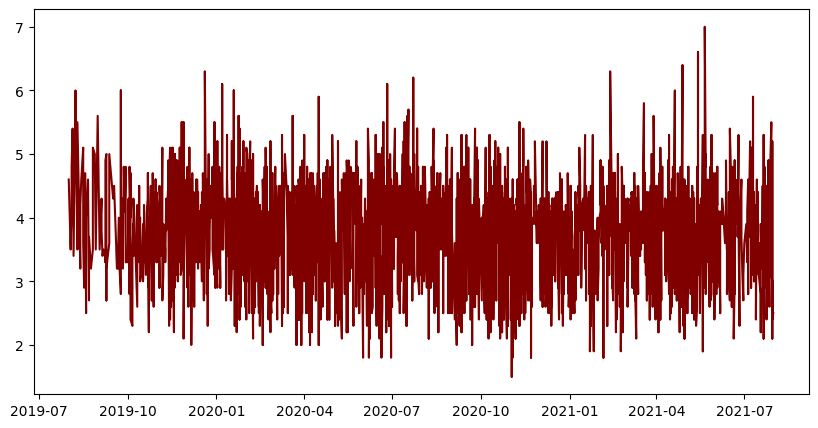

In [ ]:
#Plotting time series curve
plt.figure(figsize=(10,5))
plt.plot(df.Date,df.Magnitude,color='maroon')
plt.show()

In [157]:
numeric_columns = []
for column in df.columns:
    if df.dtypes[column] !="object":
        numeric_columns.append(column)
print(numeric_columns)

['Latitude', 'Longitude', 'Depth', 'Magnitude', 'Date']


<ipython-input-158-7e157f08b030>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df[numeric_columns].corr()


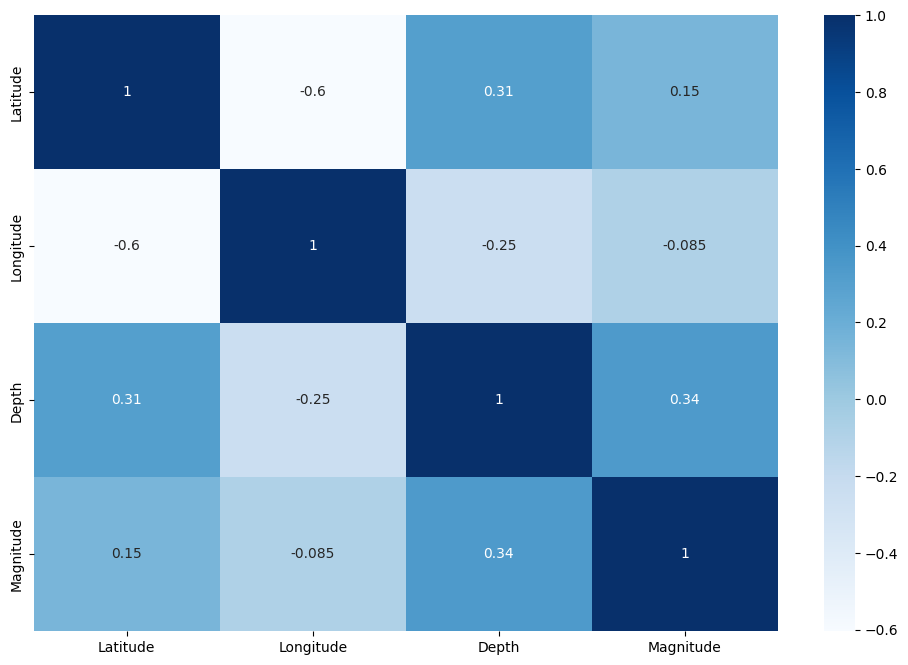

In [158]:
corr_mat = df[numeric_columns].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_mat, annot=True, cmap="Blues")
plt.show()

            Latitude  Longitude       Depth  Magnitude
Date                                                  
2019-08-01    14.500    92.9000   10.000000      4.600
2019-08-03    23.550    91.1500   32.000000      3.550
2019-08-04    18.500    94.5500   25.000000      4.450
2019-08-05    36.600    71.3000  190.000000      5.400
2019-08-06    26.100    89.9000   33.000000      3.400
...              ...        ...         ...        ...
2021-07-26    28.870    80.3725   22.250000      4.375
2021-07-27    35.125    74.5200   85.000000      3.450
2021-07-29    24.740    94.2300   19.000000      4.300
2021-07-30    28.880    80.1600   29.666667      3.200
2021-07-31    29.060    77.4200    5.000000      2.500

[679 rows x 4 columns]


<ipython-input-112-bc317a9c4231>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_datewise = df.groupby(by='Date').mean()


<Axes: xlabel='Date'>

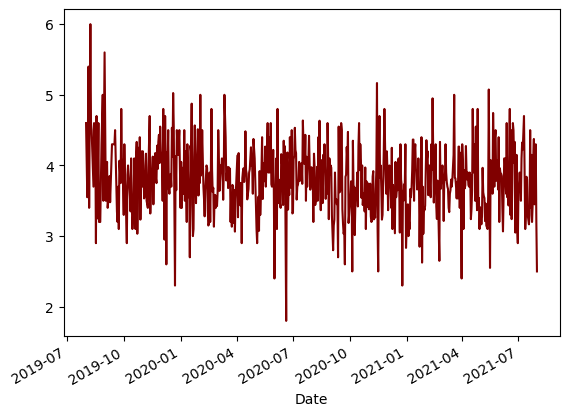

In [ ]:
#Grouping the dataset
df_datewise = df.groupby(by='Date').mean()
print(df_datewise)
df_datewise.Magnitude.plot(color='maroon')

In [ ]:
df_model = df_datewise.drop(columns=['Depth'])
print(df_model)

            Latitude  Longitude  Magnitude
Date                                      
2019-08-01    14.500    92.9000      4.600
2019-08-03    23.550    91.1500      3.550
2019-08-04    18.500    94.5500      4.450
2019-08-05    36.600    71.3000      5.400
2019-08-06    26.100    89.9000      3.400
...              ...        ...        ...
2021-07-26    28.870    80.3725      4.375
2021-07-27    35.125    74.5200      3.450
2021-07-29    24.740    94.2300      4.300
2021-07-30    28.880    80.1600      3.200
2021-07-31    29.060    77.4200      2.500

[679 rows x 3 columns]


In [ ]:
df_model = df_model.resample('D').sum()
df_model.reset_index(inplace=True)

In [ ]:
df_model

,Date,Latitude,Longitude,Magnitude
0,2019-08-01,14.500,92.90,4.60
1,2019-08-02,0.000,0.00,0.00
2,2019-08-03,23.550,91.15,3.55
3,2019-08-04,18.500,94.55,4.45
4,2019-08-05,36.600,71.30,5.40
...,...,...,...,...
726,2021-07-27,35.125,74.52,3.45
727,2021-07-28,0.000,0.00,0.00
728,2021-07-29,24.740,94.23,4.30
729,2021-07-30,28.880,80.16,3.20


# Visualising on World Map


In [ ]:
map=folium.Map(location=[20.5937,78.9629],zoom_start=4)
map

In [ ]:
longitudes = df_model["Longitude"].tolist()
latitudes = df_model["Latitude"].tolist()

length = len(latitudes)
for i in range(length):
  map.add_child(folium.Marker(location=[latitudes[i],longitudes[i]],icon=folium.Icon(color='maroon')))

map

<ipython-input-117-7b648e6f8beb>:6: UserWarning: color argument of Icon should be one of: {'darkpurple', 'beige', 'darkgreen', 'blue', 'lightblue', 'black', 'lightgreen', 'darkred', 'orange', 'cadetblue', 'green', 'darkblue', 'gray', 'pink', 'purple', 'lightgray', 'red', 'lightred', 'white'}.
  map.add_child(folium.Marker(location=[latitudes[i],longitudes[i]],icon=folium.Icon(color='maroon')))


#Training the Model

In [ ]:
df_model = df_model[['Date','Magnitude']]
df_model.columns = ['ds','y']

In [ ]:
#Splitting the dataset
train_df = df_model[:-20]
test_df = df_model[-20:]

 **PROPHET**



---



Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

In [ ]:
#Fitting the model
prophet_model = Prophet(daily_seasonality=True,yearly_seasonality=True)
model = prophet_model.fit(train_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp7c_xejc2/zbmtduaa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7c_xejc2/5b6421il.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69318', 'data', 'file=/tmp/tmp7c_xejc2/zbmtduaa.json', 'init=/tmp/tmp7c_xejc2/5b6421il.json', 'output', 'file=/tmp/tmp7c_xejc2/prophet_model_796nfr1/prophet_model-20230703082734.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:27:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:27:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = prophet_model.make_future_dataframe(periods=50,freq='D')
forecast = prophet_model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-08-01,4.324182,2.064610,4.807449,4.324182,4.324182,-0.843029,-0.843029,-0.843029,-1.091657,...,0.025317,0.025317,0.025317,0.223311,0.223311,0.223311,0.0,0.0,0.0,3.481153
1,2019-08-02,4.325434,2.192249,4.710744,4.325434,4.325434,-0.903591,-0.903591,-0.903591,-1.091657,...,-0.017869,-0.017869,-0.017869,0.205935,0.205935,0.205935,0.0,0.0,0.0,3.421843
2,2019-08-03,4.326686,2.149022,4.834884,4.326686,4.326686,-0.786421,-0.786421,-0.786421,-1.091657,...,0.117625,0.117625,0.117625,0.187610,0.187610,0.187610,0.0,0.0,0.0,3.540265
3,2019-08-04,4.327938,2.000135,4.633393,4.327938,4.327938,-1.010610,-1.010610,-1.010610,-1.091657,...,-0.087308,-0.087308,-0.087308,0.168355,0.168355,0.168355,0.0,0.0,0.0,3.317328
4,2019-08-05,4.329190,2.052655,4.506679,4.329190,4.329190,-0.976635,-0.976635,-0.976635,-1.091657,...,-0.033163,-0.033163,-0.033163,0.148184,0.148184,0.148184,0.0,0.0,0.0,3.352555


In [ ]:
forecast_test = prophet_model.predict(test_df)
forecast_test.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-07-12,4.666813,2.540154,5.234001,4.666813,4.666813,-0.808626,-0.808626,-0.808626,-1.091657,...,-0.033163,-0.033163,-0.033163,0.316194,0.316194,0.316194,0.0,0.0,0.0,3.858188
1,2021-07-13,4.666516,2.726678,5.310418,4.666516,4.666516,-0.734686,-0.734686,-0.734686,-1.091657,...,0.031260,0.031260,0.031260,0.325711,0.325711,0.325711,0.0,0.0,0.0,3.931831
2,2021-07-14,4.666219,2.567694,5.167265,4.666219,4.666219,-0.794029,-0.794029,-0.794029,-1.091657,...,-0.035862,-0.035862,-0.035862,0.333490,0.333490,0.333490,0.0,0.0,0.0,3.872190
3,2021-07-15,4.665922,2.635109,5.221415,4.665922,4.665922,-0.726817,-0.726817,-0.726817,-1.091657,...,0.025317,0.025317,0.025317,0.339523,0.339523,0.339523,0.0,0.0,0.0,3.939105
4,2021-07-16,4.665625,2.598234,5.282777,4.665625,4.665625,-0.765705,-0.765705,-0.765705,-1.091657,...,-0.017869,-0.017869,-0.017869,0.343821,0.343821,0.343821,0.0,0.0,0.0,3.899920


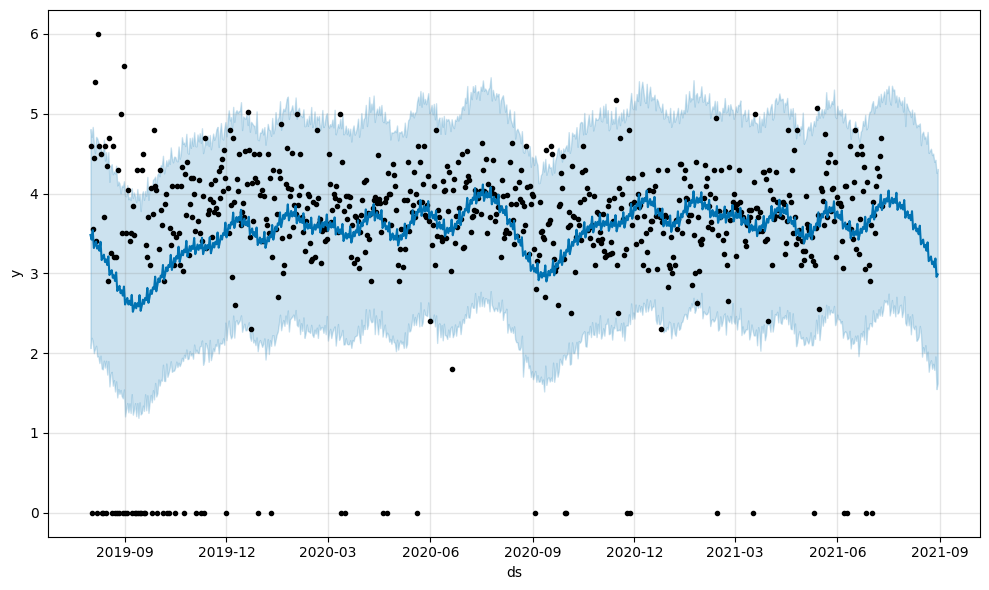

In [ ]:
future_eq = prophet_model.plot(forecast)

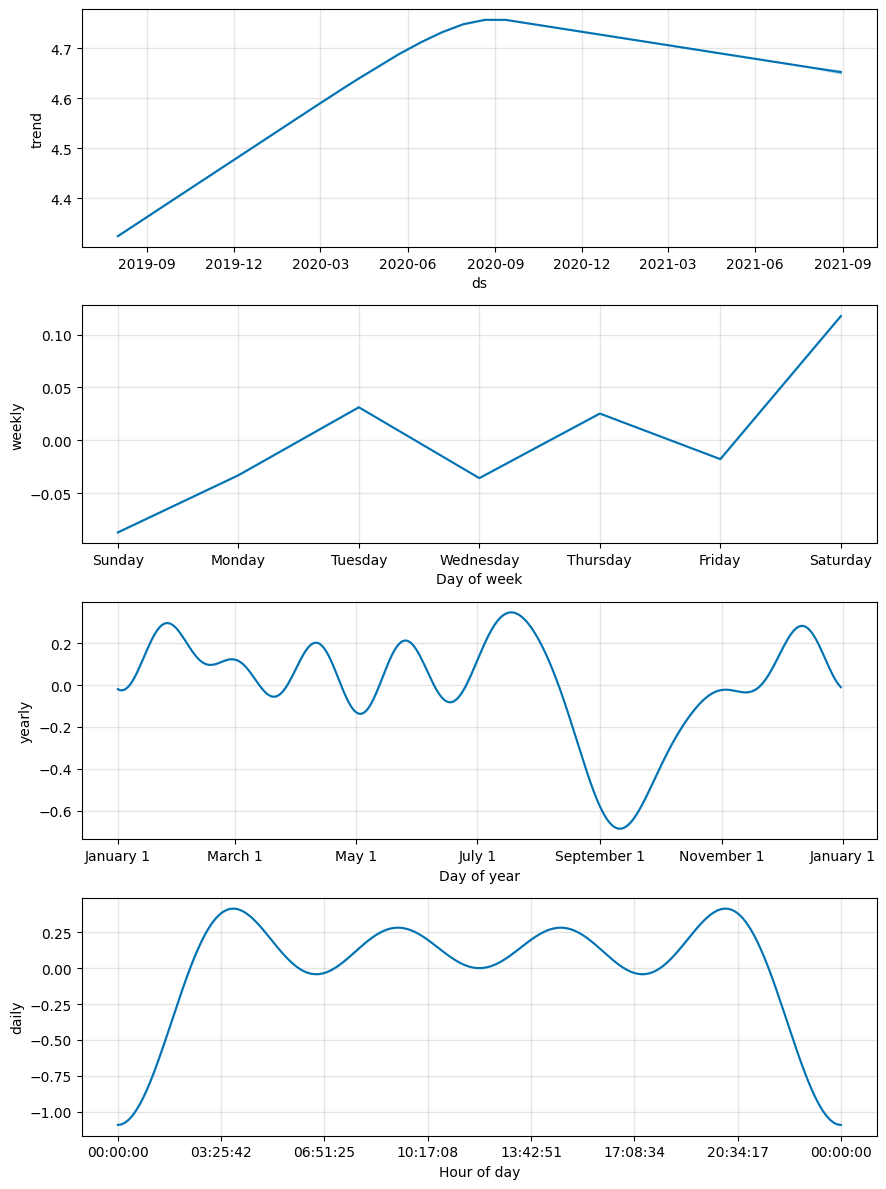

In [ ]:
prophet_model.plot_components(forecast);

In [ ]:
forecast_test = forecast_test[['ds','yhat', 'yhat_lower', 'yhat_upper']]
forecast_test

,ds,yhat,yhat_lower,yhat_upper
0,2021-07-12,3.858188,2.540154,5.234001
1,2021-07-13,3.931831,2.726678,5.310418
2,2021-07-14,3.872190,2.567694,5.167265
3,2021-07-15,3.939105,2.635109,5.221415
4,2021-07-16,3.899920,2.598234,5.282777
5,2021-07-17,4.037706,2.718440,5.316238
6,2021-07-18,3.833389,2.498401,5.175348
7,2021-07-19,3.886522,2.536221,5.211410
8,2021-07-20,3.948354,2.577441,5.235565
9,2021-07-21,3.877123,2.559277,5.166761


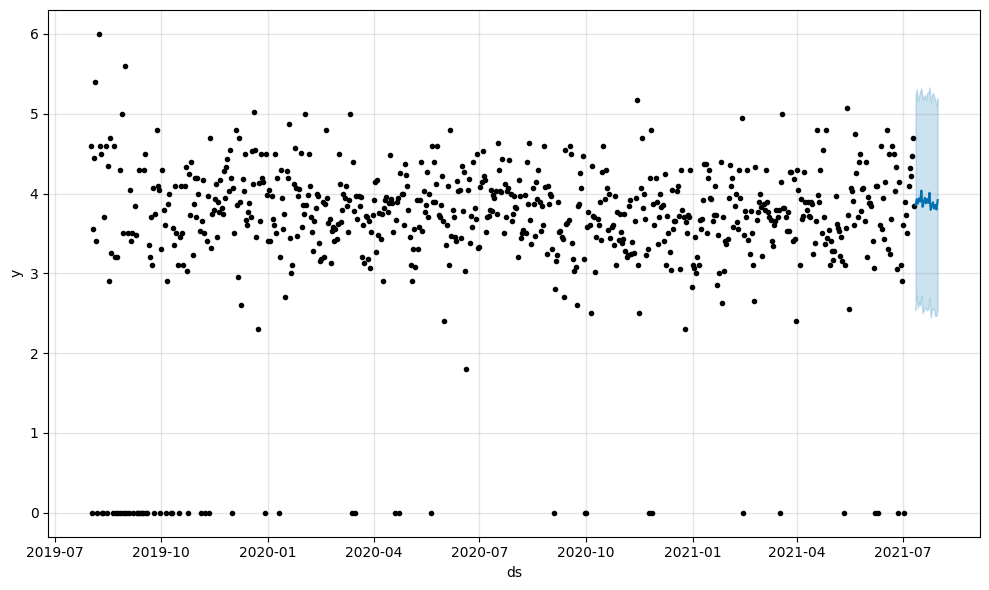

In [ ]:
prophet_model.plot(forecast_test);

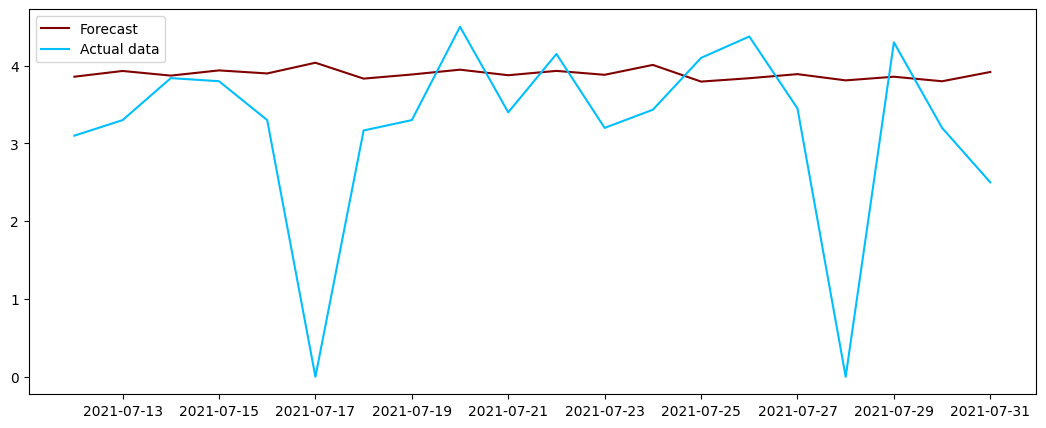

In [ ]:
plt.figure(figsize=(13,5))
plt.plot(forecast_test.ds,forecast_test.yhat,c ='maroon',label='Forecast')
plt.plot(test_df.ds,test_df.y,c='deepskyblue',label='Actual data')
plt.legend()